In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from numpy import arange
%cd '/content/drive/MyDrive'
co_archivo = pd.read_excel('base Runt 2022.xlsx', sheet_name='Hoja1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
co_archivo.head(5)

,AÑO MI,MES MI,DIA MI,CLASE,MARCA,MARCA COMERCIAL,LINEA,LINEA COMERCIAL,MODELO,COLOR,...,MINICIPIO/CIUDAD,MINICIPIO/CIUDAD2,NUEVAS ZONAS,COMBUSTIBLE,PRENDA(SI/NO),CIUDAD RESIDENCIA PROPIETARIO,CIUDAD DE RESIDENCIA 2,MATRICULA,Tipo de Usuario,SEGMENTACION DE PRECIO
0,2022,1,3,MOTOCICLETA,BENELLI,BENELLI,180S,180S,2022,BLANCO,...,MADRID,CundinamarcaMADRID,CENTRO,GASOLINA,NO,SOACHA,SOACHA,1,Otras,Otras
1,2022,1,3,MOTOCICLETA,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2022,MULTICOLOR,...,PRADERA,Valle del CaucaPRADERA,PACIFICO,GASOLINA,SI,CANDELARIA - EL LAURO,CANDELARIA - EL LAURO,1,MOVILIDAD,Cub Low Price
2,2022,1,3,MOTOCICLETA,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2022,MULTICOLOR,...,FLORIDA,Valle del CaucaFLORIDA,PACIFICO,GASOLINA,NO,CALI,CALI,1,MOVILIDAD,Cub Low Price
3,2022,1,3,MOTOCICLETA,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2022,NEGRO MATE,...,FLORIDA,Valle del CaucaFLORIDA,PACIFICO,GASOLINA,NO,CALI,CALI,1,MOVILIDAD,Cub Low Price
4,2022,1,3,MOTOCICLETA,VICTORY,VICTORY,ADVANCE R,ADVANCE 110,2022,NEGRO MATE,...,FLORIDA,Valle del CaucaFLORIDA,PACIFICO,GASOLINA,NO,CALI,CALI,1,MOVILIDAD,Cub Low Price


In [ ]:
total = co_archivo.count()['MATRICULA']
total

804763

In [ ]:
import seaborn as sns

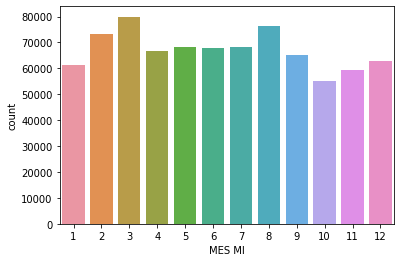

In [ ]:
sns.countplot(x=co_archivo['MES MI'])

Analisis: Los meses donde más se vendieron motocicletas en el año fueron Marzo y Agosto. A través de este gráfico tambien es posible concluir que el ultimo trimestre presentó una reducción imporante en las ventas del mercado en compaaración al resto del año.

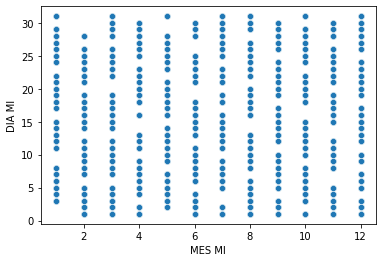

In [ ]:
sns.scatterplot(data=co_archivo, x="MES MI", y="DIA MI")

Analisis: De acuerdo al grafico, no todos los dias se registran ventas de motos nuevas. Existen dias en que no se registra nada, en el grafico se observa que por ejemplo, el 9 de enero del 2022 no tiene registro, dia que correpsonde a un domingo. Con la informaci[on disponible, es posible asumir que en los domingos y festivos no se registran ventas de motos. 

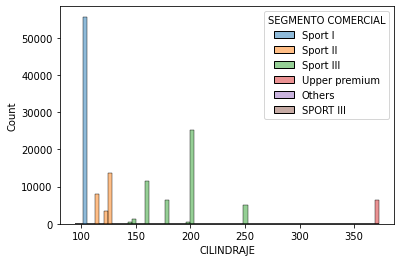

In [ ]:
Bajaj_sales = co_archivo.query("MARCA == 'BAJAJ'")

sns.histplot(data=Bajaj_sales, x='CILINDRAJE',hue='SEGMENTO COMERCIAL')


Analisis: Bajaj, la marca lider de mercado tiene motos en casi todos los segmentos. El segmento Sport I es donde mas motos vende, con sus modelos de 100CC, seguido por sus modelos Sport III, prinicipalmente en el ilindraje de 200cc.

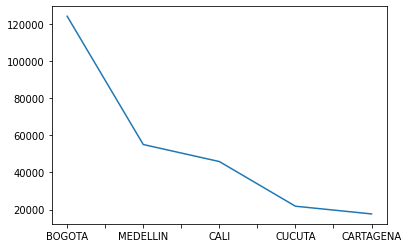

In [ ]:
Top5_town = co_archivo['CIUDAD RESIDENCIA PROPIETARIO'].value_counts().head(5)
Top5_town.plot()

El top 5 de ciudades donde mas se venden motocicletas son Bogota, Medellin, Cali, Cucuta y Cartagena. Al ser las ciudades mas relevantes, es importante revisar como se realiza la estrategia de la marca en cada una de ellas.

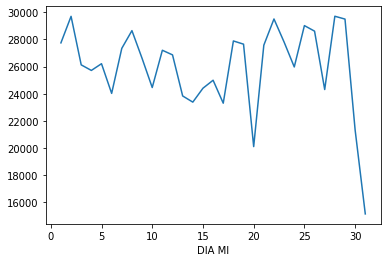

In [ ]:
import matplotlib.pyplot as plt

count_categoria = co_archivo.groupby('DIA MI').count()['MATRICULA']
 
count_categoria.plot()
plt.show()

En este grafico se pueden observar las ventas totales de motos por dia.

 Si comparamos el comportamiento de los ultimos 10 dias del mes, se puede observar que en esos dias se vende más, pues tiene picos más altos en comparación a los primeros 20 dias del mes, por lo cual se le puede recomendar al equipo de ventas y marketing realizar acciones especificas para los 10 dias finales del mes.

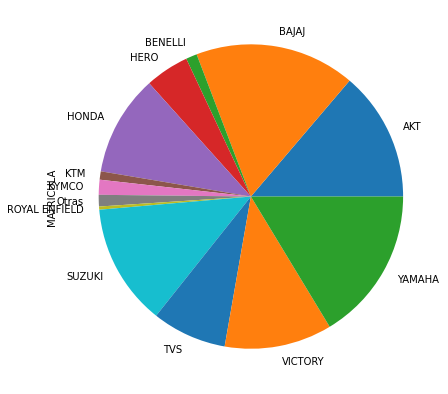

In [ ]:
datos = co_archivo.groupby('MARCA COMERCIAL').count()['MATRICULA']
fig,ax= plt.subplots(figsize = (10,7))
datos.plot.pie()
plt.show()

Analisis: En este grafico de pie se observa que la mayor parte del mercado lo tiene Bajaj y Yamaha, las marcas lideres en ventas del mercado, seguidas por AKT, Suzuki, Honda y Hero.

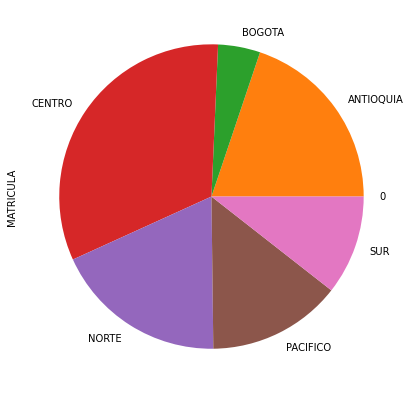

In [ ]:
datos2 = co_archivo.groupby('NUEVAS ZONAS').count()['MATRICULA']
fig,ax= plt.subplots(figsize = (10,7))
datos2.plot.pie()
plt.show()

Analisis: La zona centro es la mas representativa en cuanto a la venda de motos, seguida por Antioquia y Centro en tercer lugar. 

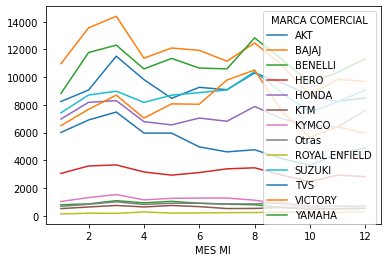

In [ ]:
tabla = co_archivo.groupby([pd.Grouper(key='MES MI'), 'MARCA COMERCIAL']).size().unstack()
df_marcas = tabla.groupby('MES MI').sum()
df_marcas.plot(kind='line')

Analisis: A principios de año Bajaj tenía el liderazgo indiscutible del mercado, pero a finales se puede observar como Yamaha lo supera, ubicandose en el primer lugar. De forma similar se puede observar como AKT supera a AKT y toma el tercer lugar en diciembre. 

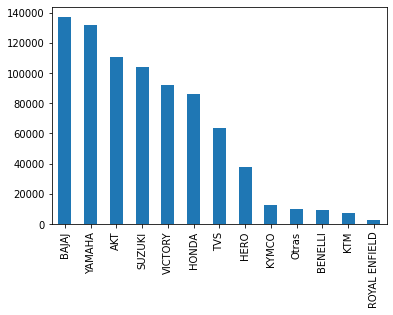

In [ ]:
co_archivo['MARCA COMERCIAL'].value_counts().plot.bar()

Analisis: en el 2022, el TOP 3 de marcas que más vendiron motos en Colombia fueron Bajaj, Yamaha y AKT. 

In [ ]:
co_archivo['MARCA COMERCIAL'].value_counts()


BAJAJ            137058
YAMAHA           131485
AKT              110836
SUZUKI           104029
VICTORY           91916
HONDA             86124
TVS               63816
HERO              37551
KYMCO             12765
Otras              9892
BENELLI            9461
KTM                7126
ROYAL ENFIELD      2704
Name: MARCA COMERCIAL, dtype: int64